In [1]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;

In [2]:
df = pd.read_csv('outlier_customer_data.csv')
df.head()

,Age,EstimatedSalary,Purchased
0,58,146413,0
1,48,64327,0
2,34,88904,0
3,27,23797,0
4,40,67882,0


In [3]:
df.shape

(1020, 3)

In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              1020 non-null   int64
 1   EstimatedSalary  1020 non-null   int64
 2   Purchased        1020 non-null   int64
dtypes: int64(3)
memory usage: 24.0 KB


In [8]:
df.describe()

,Age,EstimatedSalary,Purchased
count,1020.000000,1020.000000,1020.000000
mean,41.126471,89661.814706,0.508824
std,14.280269,51136.158627,0.500167
min,20.000000,20060.000000,0.000000
25%,30.000000,53272.500000,0.000000
50%,41.000000,84521.000000,1.000000
75%,51.000000,119789.750000,1.000000
max,119.000000,479297.000000,1.000000


In [9]:
from ydata_profiling import ProfileReport
data = ProfileReport(df)
data.to_file(output_file='index.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 55.90it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
       df.drop('Purchased', axis=1),
       df['Purchased'],
       test_size=0.3,
       random_state=1
)
x_train.shape, x_test.shape

((714, 2), (306, 2))

In [33]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

scale.fit(x_train)

x_train_scale = scale.transform(x_train)
x_test_scale = scale.transform(x_test)

x_train_scale = pd.DataFrame(x_train_scale, columns=x_train.columns)
x_test_scale = pd.DataFrame(x_test_scale, columns=x_test.columns)

In [34]:
np.round(x_train_scale.describe(), 1)

,Age,EstimatedSalary
count,714.0,714.0
mean,-0.0,-0.0
std,1.0,1.0
min,-1.5,-1.4
25%,-0.8,-0.7
50%,0.0,-0.1
75%,0.7,0.6
max,5.4,7.7


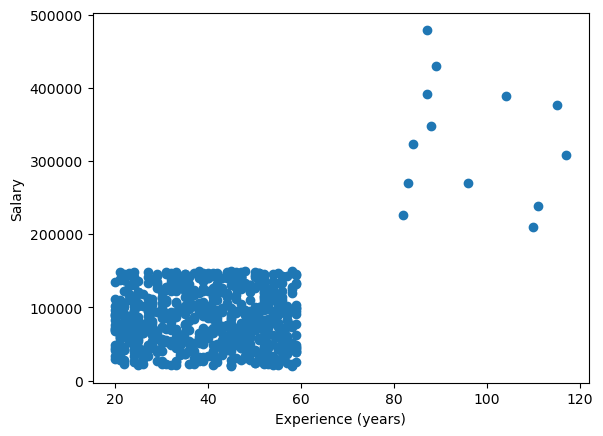

In [35]:
%matplotlib inline
plt.scatter(x_train["Age"], x_train["EstimatedSalary"])
plt.xlabel("Experience (years)")
plt.ylabel("Salary")
plt.show()

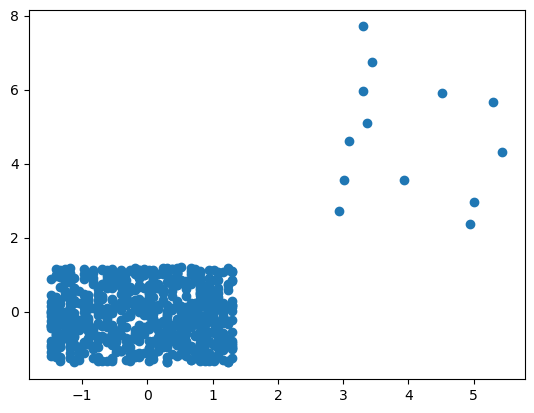

In [36]:
%matplotlib inline
plt.scatter(x_train_scale['Age'], x_train_scale['EstimatedSalary'])
plt.show()